# Deep Learning in Finance

Author: Abdullah Ayub ID: 2111163

This project can be titled as Deep Learning in Finance in which we will explore
various machine learning and deep learning approaches to predict the stock prices. 
for two world renowned companies 
**McDonalds and Intel Corporation**

On the **McDonalds data**, we focussed on 
- Linear Regression
- MLP
- Scikit learn's

whereas for

the **Intel Corporation dataset**, we explored deep learning approaches of 
- CNN
- Recurrent Neural Network






## Data Set

The Data was downloaded for the last 12 years and uses monthly data for prediction of stock values using **yfinance API provided by Yahoo**.

First of all we are going to install the Yfinance library. It is an API by Yahoo which provides live data of multiple stocks of various companies.

- Using this API we fetched our dataset

We have selected a time frame of
the data i.e. we have defined a time limit of which time frame, we will be fetching
the data. The starting date was chosen to be **January 1st,2010 and ending date
was chosen as Dec 31,2021**.





## Multilayer perceptrons for time series forecasting






Multilayer perceptrons (MLP) are one of the basic architectures of neural networks. At a very high level, they consist of three components:

- The input layer: A vector of features.
- The hidden layers: Each hidden layer consists of N neurons. The output layer: Output of the network; depends on the task (regression/classification).

A multilayer perceptron (MLP) is a fully connected class of feedforward artificial neural network (ANN). The term MLP is used ambiguously, sometimes loosely to mean any feedforward ANN, sometimes strictly to refer to networks composed of multiple layers of perceptrons (with threshold activation).Multilayer perceptrons are sometimes colloquially referred to as "vanilla" neural networks, especially when they have a single hidden layer.

An MLP consists of at least three layers of nodes: an input layer, a hidden layer and an output layer. Except for the input nodes, each node is a neuron that uses a nonlinear activation function. MLP utilizes a supervised learning technique called backpropagation for training.Its multiple layers and non-linear activation distinguish MLP from a linear perceptron. It can distinguish data that is not linearly separable.

Souce: https://en.wikipedia.org/wiki/Multilayer_perceptron



In [ ]:
%matplotlib inline
#%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.rcParams['figure.figsize'] = [12, 8]
# plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

###1. Import the libraries: First of all we are going to install the Yfinance library. it is an API by Yahoo which provides live data of multiple stocks of various companies. Using this API we will be fetching our dataset. 

In [ ]:
#import all librarires 
#install Yfinance library, for downloading live data of multiple stocks

try:
    import yfinance
    print("module 'yfinance' is installed")
except ModuleNotFoundError:
    print("module 'yfinance' is not installed")
    !pip install yfinance

import yfinance as yf
import numpy as np
import seaborn as sns
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import (Dataset, TensorDataset, 
                              DataLoader, Subset)

from sklearn.metrics import mean_squared_error

print(torch.__version__)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

module 'yfinance' is not installed
     |████████████████████████████████| 6.4 MB 10.5 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
1.10.0+cu111


## 2. Define parameters: Here we are specifying the data we are going to    download. From the available data we have choosen the data of stocks for McDonald company whose data ticker is 'MCD'. We have selected a time frame of the data i.e. we have defined a time limit of which time frame, we will be fetching the data. The starting date was choosen to be January 1st,2010 and ending date was choosen as Dec 31,2021

In [ ]:
# Data set for  MCD
TICKER = 'MCD'
START_DATE = '2010-01-02'
END_DATE = '2021-12-31'
N_LAGS = 3

# neural network 
VALID_SIZE = 12
BATCH_SIZE = 5
N_EPOCHS = 1000

## 3. Download and prepare the data: Here we are downloading the data for the time we specified above. The data we download was daily based data and we have resampled the data to monthly basis instead of daily basis

In [ ]:
# Dowload and prepare the data set
df = yf.download(TICKER, 
                 start=START_DATE, 
                 end=END_DATE,
                 progress=False)
#As we can see we index Date and the data contains 5 variables
df.head() 

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,62.630001,63.07,62.310001,62.779999,44.199619,5839300
2010-01-05,62.660000,62.75,62.189999,62.299999,43.861698,7099000
2010-01-06,62.200001,62.41,61.060001,61.450001,43.263241,10551300
2010-01-07,61.250000,62.34,61.110001,61.900002,43.580070,7517700
2010-01-08,62.270000,62.41,61.599998,61.840000,43.537823,6107300


In [ ]:
# resampled the data into monthly basis
df = df.resample('M').last()
prices = df['Adj Close'].values
prices.shape # prices

(144,)

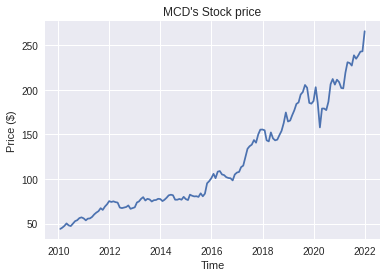

In [ ]:
fig, ax = plt.subplots()

ax.plot(df.index, prices)
ax.set(title=f"{TICKER}'s Stock price", 
       xlabel='Time', 
       ylabel='Price ($)');

In [ ]:
# check the description of data set
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,144.000000,144.000000,144.000000,144.000000,144.000000,1.440000e+02
mean,134.630347,135.524792,133.658264,134.503125,118.806640,5.264640e+06
std,53.100369,53.529609,52.576923,53.063554,58.078205,2.182564e+06
min,62.820000,63.220001,62.389999,62.430000,43.953201,1.714600e+06
25%,94.787498,95.250000,94.289997,94.509998,74.724487,3.656075e+06
50%,114.535000,115.099998,114.125000,114.760002,99.585636,4.867200e+06
75%,179.169998,179.682507,176.494995,177.872505,164.743774,6.446250e+06
max,269.000000,269.260010,266.700012,267.209991,265.731750,1.295470e+07


In [ ]:
returns=(df-df.shift(1))/df.shift(1)

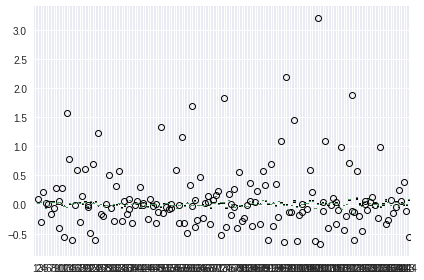

In [ ]:
fig, ax = plt.subplots()
#fig.set_size_inches(12, 6)
plt.boxplot(returns)
plt.tight_layout()

In [ ]:
# remove rows that contain na value
returns.dropna()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-02-28,0.026106,0.023885,0.023401,0.022745,0.031438,0.092073
2010-03-31,0.041731,0.041094,0.043540,0.044949,0.044949,-0.304377
2010-04-30,0.065227,0.064104,0.056431,0.058004,0.058003,0.208304
2010-05-31,-0.059975,-0.056896,-0.051712,-0.052699,-0.044739,0.028450
2010-06-30,-0.014128,-0.011681,-0.014232,-0.014954,-0.014955,0.005597
...,...,...,...,...,...,...
2021-08-31,-0.033217,-0.031295,-0.031130,-0.021631,-0.016267,0.257318
2021-09-30,0.038261,0.032348,0.026207,0.015371,0.015371,0.067629
2021-10-31,-0.007231,0.002730,0.006852,0.018415,0.018415,0.380196


Text(0.5, 6.79999999999999, 'Monthly returns')

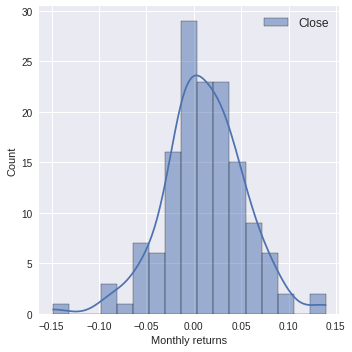

In [ ]:
sns.displot(returns['Close'], kde=True, label='Close')
plt.legend(loc='upper right', fontsize=12)
plt.xlabel('Monthly returns')

## 4. Define a function for transforming time series into a dataset for the MLP: Here we are going to define a function that we will be needing to convert our time series data into a suitable format that it can be put forwarded to a Multi layer perceptron. The input parameters and output parameters of the function has been specified as well

In [ ]:
def create_input_data(series, n_lags=1):
    '''
    Function for transforming time series into input acceptable by a multilayer perceptron.
    
    Parameters
    ----------
    series : np.array
        The time series to be transformed
    n_lags : int
        The number of lagged observations to consider as features

    Returns
    -------
    X : np.array
        Array of features
    y : np.array
        Array of target
    '''
    X, y = [], []

    for step in range(len(series) - n_lags):
        end_step = step + n_lags
        X.append(series[step:end_step])
        y.append(series[end_step])
    return np.array(X), np.array(y)

In [ ]:
prices.round(2)

array([ 43.95,  45.34,  47.37,  50.12,  47.88,  47.16,  49.93,  52.7 ,
        53.75,  56.1 ,  56.92,  55.8 ,  53.56,  55.47,  55.77,  57.4 ,
        60.21,  62.26,  63.86,  67.21,  65.29,  69.02,  71.54,  75.15,
        74.19,  74.88,  73.99,  73.5 ,  67.91,  67.3 ,  67.93,  68.56,
        70.29,  66.5 ,  67.28,  68.19,  73.66,  74.73,  77.68,  79.59,
        75.84,  77.75,  77.03,  74.71,  76.17,  76.42,  77.73,  77.46,
        75.18,  76.6 ,  78.92,  81.62,  82.32,  81.76,  76.74,  76.72,
        77.61,  76.73,  79.95,  77.38,  76.34,  82.38,  81.17,  80.43,
        80.6 ,  79.88,  83.91,  80.54,  83.52,  95.15,  97.53, 100.93,
       105.74, 100.87, 108.18, 108.88, 105.06, 104.35, 102.01, 101.07,
       100.8 ,  98.37, 105.03, 107.19, 107.94, 113.24, 114.98, 124.13,
       133.86, 136.72, 138.49, 143.65, 140.69, 149.88, 155.34, 155.48,
       154.59, 143.39, 142.15, 152.21, 145.45, 143.34, 144.12, 149.33,
       153.99, 162.84, 174.6 , 164.46, 165.58, 171.35, 177.  , 184.15,
      

## 5. Transform the considered time series into input for the MLP: Here we are using the above function to transform the data into the MLP format. After converting the data, we are also visualising the output 

In [ ]:
# Transforming the data into MLP format
X, y = create_input_data(prices, N_LAGS)

X_tensor = torch.from_numpy(X).float()
y_tensor = torch.from_numpy(y).float().unsqueeze(dim=1)

## 6. Create training and validation sets: In order to train and test the model, we are going to have to split our data into two sets. One of the sest will be used for training while a portion of it will be reserved for the validation so we can see the performance of the model on the data. 

In [ ]:
#Defining the datasets for training and validation

valid_ind = len(X) - VALID_SIZE

dataset = TensorDataset(X_tensor, y_tensor)

train_dataset = Subset(dataset, list(range(valid_ind)))
valid_dataset = Subset(dataset, list(range(valid_ind, len(X))))

train_loader = DataLoader(dataset=train_dataset,
                          batch_size=BATCH_SIZE)
valid_loader = DataLoader(dataset=valid_dataset, 
                          batch_size=BATCH_SIZE)

Inspect the observations from the first batch (BATCH_SIZE=5):

In [ ]:
next(iter(train_loader))[0]

tensor([[43.9532, 45.3350, 47.3728],
        [45.3350, 47.3728, 50.1206],
        [47.3728, 50.1206, 47.8782],
        [50.1206, 47.8782, 47.1622],
        [47.8782, 47.1622, 49.9260]])

In [ ]:
next(iter(train_loader))[1]

tensor([[50.1206],
        [47.8782],
        [47.1622],
        [49.9260],
        [52.7019]])

Check the size of the datasets:

In [ ]:
# spli our data set into two sets
# print the size of Training and Testing Data Set
print(f'Size of datasets - training: {len(train_loader.dataset)} | validation: {len(valid_loader.dataset)}')

Size of datasets - training: 129 | validation: 12


## 7. Use naive forecast as a benchmark and evaluate the performance: Here we are going to use the naive forecast model to check the model response and we are calculating the Mean squared error 

In [ ]:
# we defined a benchmark by using a naive forecast as a benchmark and evaluated the performance.

naive_pred = prices[len(prices) - VALID_SIZE - 1:-1]
y_valid = prices[len(prices) - VALID_SIZE:]

# calculate root mean square error
naive_mse = mean_squared_error(y_valid, naive_pred)
naive_rmse = np.sqrt(naive_mse)
print(f"Naive forecast - MSE: {naive_mse:.2f}, RMSE: {naive_rmse:.2f}")

Naive forecast - MSE: 98.71, RMSE: 9.94


## Testing Linear Regression


### In the following lines of code we are going to make a linear regression model to predict the stock prices. the model has been imported from the sklearn library and at the end, using the matplotlib library of the python we are going to visualise the forecast of the model to check how good it is performing with respect to actual output on the validation set that we created above 

Linear Regression's forecast - MSE: 78.12, RMSE: 8.84
Linear Regression's coefficients: [ 0.26387741 -0.27288053  1.01609217]


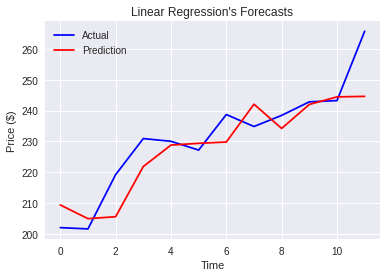

In [ ]:
# Apply the linear regression model to predict the stock prices

from sklearn.linear_model import LinearRegression

X_train = X[:valid_ind, ]
y_train = y[:valid_ind]

X_valid = X[valid_ind:, ]
y_valid = y[valid_ind:]

lin_reg = LinearRegression()
# fit the model on training data set
lin_reg.fit(X_train, y_train)

# predicting the results on the bais of testing data sets
y_pred = lin_reg.predict(X_valid)
# calculating mean squared error 
lr_mse = mean_squared_error(y_valid, y_pred)
lr_rmse = np.sqrt(lr_mse)
print(f"Linear Regression's forecast - MSE: {lr_mse:.2f}, RMSE: {lr_rmse:.2f}")
print(f"Linear Regression's coefficients: {lin_reg.coef_}")

# plot the regression line on the basis of actual and predicted reslts
fig, ax = plt.subplots()

ax.plot(y_valid, color='blue', label='Actual')
ax.plot(y_pred, color='red', label='Prediction')

ax.set(title="Linear Regression's Forecasts", 
       xlabel='Time', 
       ylabel='Price ($)')
ax.legend();

## 8. Define the MPL network's architecture:

### we choose the ReLU (Rectified Linear Unit) activation function
$$ f(x= max(0,x)$$

Here we are going to define a model architecture of the MLP Model. This is the definition of the model where we have used reLU as the activation function and also we have used a drop out of 20% to avoid the risk of overfitting the model. 

In [ ]:
class MLP(nn.Module):
   
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.linear1 = nn.Linear(input_size, 8)
        self.linear2 = nn.Linear(8, 4)
        self.linear3 = nn.Linear(4, 1)
        self.dropout = nn.Dropout(p=0.2)
    
    def forward(self, x):
        x = self.linear1(x)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.linear2(x)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.linear3(x)
        return x

## 9. Instantiate the model, the loss function and the optimizer: For the model we defined above, we are going to set the loss function and the optimizer function. We chose MSE loss function and Adam optimizer was used as the optimizer of the model to speed up the learning process of the model. 

In [ ]:
# set seed for reproducibility
torch.manual_seed(42)

# model multilayer perceptron
model = MLP(N_LAGS).to(device) 
loss_fn = nn.MSELoss()
# optimiser used Adam
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
model

MLP(
  (linear1): Linear(in_features=3, out_features=8, bias=True)
  (linear2): Linear(in_features=8, out_features=4, bias=True)
  (linear3): Linear(in_features=4, out_features=1, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

## 10. Train the network: Here we are going to train the MLP model the one we defined above and for every fifty epochs, we are going to print the model loss value to see if the loss is decreasing and the model accuracry is increasing or not

In [ ]:
PRINT_EVERY = 50
train_losses, valid_losses = [], []

for epoch in range(N_EPOCHS):
    running_loss_train = 0
    running_loss_valid = 0

    model.train()
    
    for x_batch, y_batch in train_loader:
        
        optimizer.zero_grad()
        
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)
        y_hat = model(x_batch)
        loss = loss_fn(y_batch, y_hat)
        loss.backward()
        optimizer.step()
        running_loss_train += loss.item() * x_batch.size(0)
        
    epoch_loss_train = running_loss_train / len(train_loader.dataset)
    train_losses.append(epoch_loss_train)

    with torch.no_grad():
        
        model.eval()
        
        for x_val, y_val in valid_loader:
            x_val = x_val.to(device)
            y_val = y_val.to(device)
            y_hat = model(x_val)
            loss = loss_fn(y_val, y_hat)
            running_loss_valid += loss.item() * x_val.size(0)
            
        epoch_loss_valid = running_loss_valid / len(valid_loader.dataset)
            
        if epoch > 0 and epoch_loss_valid < min(valid_losses):
            best_epoch = epoch
            torch.save(model.state_dict(), './mlp_checkpoint.pth')
            
        valid_losses.append(epoch_loss_valid)

    if epoch % PRINT_EVERY == 0:
        print(f"<{epoch}> - Train. loss: {epoch_loss_train:.2f} \t Valid. loss: {epoch_loss_valid:.2f}")
        
print(f'Lowest loss recorded in epoch: {best_epoch}')

<0> - Train. loss: 17465.17 	 Valid. loss: 59620.48
<50> - Train. loss: 2009.59 	 Valid. loss: 1819.97
<100> - Train. loss: 2174.28 	 Valid. loss: 1806.89
<150> - Train. loss: 2412.92 	 Valid. loss: 1919.98
<200> - Train. loss: 2273.97 	 Valid. loss: 988.03
<250> - Train. loss: 2608.14 	 Valid. loss: 1976.24
<300> - Train. loss: 1798.41 	 Valid. loss: 1120.31
<350> - Train. loss: 1796.37 	 Valid. loss: 1302.45
<400> - Train. loss: 1859.13 	 Valid. loss: 1626.53
<450> - Train. loss: 1811.06 	 Valid. loss: 1585.09
<500> - Train. loss: 3075.44 	 Valid. loss: 1499.65
<550> - Train. loss: 1759.80 	 Valid. loss: 1971.91
<600> - Train. loss: 1499.90 	 Valid. loss: 1391.33
<650> - Train. loss: 1913.72 	 Valid. loss: 1973.89
<700> - Train. loss: 1860.75 	 Valid. loss: 1554.53
<750> - Train. loss: 1535.05 	 Valid. loss: 1655.32
<800> - Train. loss: 1514.01 	 Valid. loss: 1663.80
<850> - Train. loss: 1900.79 	 Valid. loss: 2031.63
<900> - Train. loss: 1912.93 	 Valid. loss: 1651.65
<950> - Train.

## 11. Plot the losses over epochs: Here we going to plot the losses over epochs which will give us the idea whether the model is learning over time or not. Our output showed that after some epochs loss has decreased indicating the learning of the model

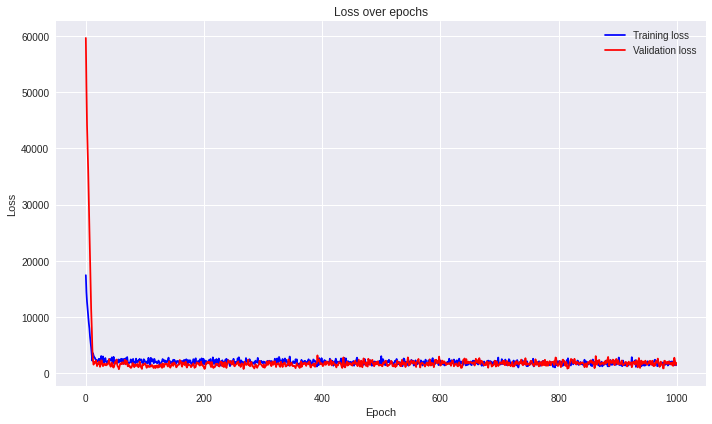

In [ ]:
train_losses = np.array(train_losses)
valid_losses = np.array(valid_losses)

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(train_losses, color='blue', label='Training loss')
ax.plot(valid_losses, color='red', label='Validation loss')

ax.set(title='Loss over epochs', 
       xlabel='Epoch', 
       ylabel='Loss')
ax.legend()

plt.tight_layout()
plt.show()

In the plot, we can see that after the initial drop (caused by randomly initialized weights), both the training loss and validation loss do not seem to have any visibly decreases over epochs.

## 12. Load the best model (with the lowest validation loss):

In [ ]:
state_dict = torch.load('mlp_checkpoint.pth')
model.load_state_dict(state_dict)

<All keys matched successfully>

## 13. Obtain the predictions:

In [ ]:
# preparing the results of predictions
y_pred, y_valid= [], []

with torch.no_grad():

    model.eval()
    
    for x_val, y_val in valid_loader:
        x_val = x_val.to(device)    
        y_pred.append(model(x_val))
        y_valid.append(y_val)
        
y_pred = torch.cat(y_pred).numpy().flatten()
y_valid = torch.cat(y_valid).numpy().flatten()

## 14. Evaluate the predictions:

MLP's forecast - MSE: 749.50, RMSE: 27.38


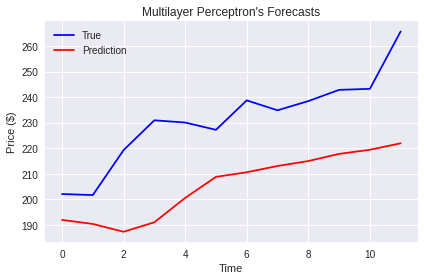

In [ ]:
mlp_mse = mean_squared_error(y_valid, y_pred)
mlp_rmse = np.sqrt(mlp_mse)
print(f"MLP's forecast - MSE: {mlp_mse:.2f}, RMSE: {mlp_rmse:.2f}")

fig, ax = plt.subplots()

ax.plot(y_valid, color='blue', label= 'True')
ax.plot(y_pred, color='red', label='Prediction')

ax.set(title="Multilayer Perceptron's Forecasts", 
       xlabel='Time', 
       ylabel='Price ($)')
ax.legend()

plt.tight_layout()
plt.show()

# A sequential approach to defining the network's architecture
Multivariate setting: We can use the multilayer perceptron in the multivariate setting. Two types of possible cases are:
- Multiple input series: Multiple time series are used to predict the future value(s) of a single time series.
- Multiple parallel series: Multiple time series are used to predict future value(s) of multiple time series simultaneously.

A sequential approach to defining the network's architecture: We can also define the network's architecture using nn.Sequential, which might be similar to anyone who worked with Keras before. The idea is that the input tensor is sequentially passed through the specified layers.
 

In the following, we define the same network as we have already used before

In [ ]:
model = nn.Sequential(
    nn.Linear(3, 8),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(8, 4),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(4, 1)
)

model

Sequential(
  (0): Linear(in_features=3, out_features=8, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.2, inplace=False)
  (3): Linear(in_features=8, out_features=4, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.2, inplace=False)
  (6): Linear(in_features=4, out_features=1, bias=True)
)

#### Estimating neural networks using `scikit-learn`

##1. Import the libraries:

In [ ]:
from sklearn.neural_network import MLPRegressor

##2. Define the MLP using scikit-learn:

In [ ]:
mlp = MLPRegressor(hidden_layer_sizes=(8, 4,), 
                   learning_rate='constant',
                   batch_size=5,
                   max_iter=1000,
                   random_state=42)

##3. Split the data into training and test set:

In [ ]:
valid_ind = len(X) - VALID_SIZE

X_train = X[:valid_ind, ]
y_train = y[:valid_ind]

X_valid = X[valid_ind:, ]
y_valid = y[valid_ind:]

## 4. Train the MLP:

In [ ]:
mlp.fit(X_train, y_train)

MLPRegressor(batch_size=5, hidden_layer_sizes=(8, 4), max_iter=1000,
             random_state=42)

## 5. Plot the loss function over epochs:

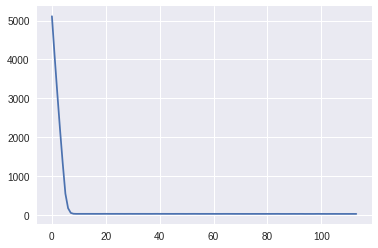

In [ ]:
plt.plot(mlp.loss_curve_)

## 6. Obtain the predictions:

In [ ]:
y_pred = mlp.predict(X_valid)

## 7. Evaluate the predictions and plot them versus the observed values:

Scikit-Learn MLP's forecast - MSE: 88.91, RMSE: 9.43


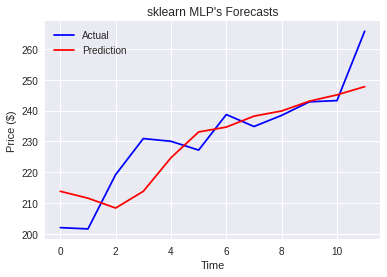

In [ ]:
sk_mlp_mse = mean_squared_error(y_valid, y_pred)
sk_mlp_rmse = np.sqrt(sk_mlp_mse)
print(f"Scikit-Learn MLP's forecast - MSE: {sk_mlp_mse:.2f}, RMSE: {sk_mlp_rmse:.2f}")

fig, ax = plt.subplots()

ax.plot(y_valid, color='blue', label='Actual')
ax.plot(y_pred, color='red', label='Prediction')

ax.set(title="sklearn MLP's Forecasts", 
       xlabel='Time', 
       ylabel='Price ($)')
ax.legend();

### Multi-period forecast

Multi-period forecast: Lastly, we can also use the multilayer perceptron to forecast more than one timestep ahead. To do so, we need to appropriately prepare the input data and slightly modify the network's architecture to account for more than one output.

1. Define a modified function for creating a dataset for the MLP:

In [ ]:
def create_input_data(series, n_lags=1, n_leads=1):
    '''
    Function for transforming time series into input acceptable by a multilayer perceptron.
    
    Parameters
    ----------
    series : np.array
        The time series to be transformed
    n_lags : int
        The number of lagged observations to consider as features
    n_leads : int
        The number of future periods we want to forecast for
        
    Returns
    -------
    X : np.array
        Array of features
    y : np.array
        Array of target
    '''
    X, y = [], []

    for step in range(len(series) - n_lags - n_leads + 1):
        end_step = step + n_lags
        forward_end = end_step + n_leads
        X.append(series[step:end_step])
        y.append(series[end_step:forward_end])
    return np.array(X), np.array(y)

2. Create features and target from the time series of prices:

In [ ]:
# parameters for the dataset
N_LAGS = 3
N_FUTURE = 2

X, y = create_input_data(prices, N_LAGS, N_FUTURE)

X_tensor = torch.from_numpy(X).float()
y_tensor = torch.from_numpy(y).float()

3. Create training and validation sets:

In [ ]:
dataset = TensorDataset(X_tensor, y_tensor)

valid_ind = len(X) - VALID_SIZE + (N_FUTURE - 1)

train_dataset = Subset(dataset, list(range(valid_ind)))
valid_dataset = Subset(dataset, list(range(valid_ind, len(X))))

train_loader = DataLoader(dataset=train_dataset, 
                          batch_size=BATCH_SIZE)
valid_loader = DataLoader(dataset=valid_dataset, 
                          batch_size=BATCH_SIZE)

4. Define the MLP for multi-period forecasting:

In [ ]:
class MLP(nn.Module):
    
    def __init__(self, input_size, output_size):
        super(MLP, self).__init__()
        self.linear1 = nn.Linear(input_size, 16)
        self.linear2 = nn.Linear(16, 8)
        self.linear3 = nn.Linear(8, output_size)
        self.dropout = nn.Dropout(p=0.2)
    
    def forward(self, x):
        x = self.linear1(x)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.linear2(x)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.linear3(x)
        return x  

5. Instantiate the model, the loss function and the optimizer:

In [ ]:
# set seed for reproducibility
torch.manual_seed(42)

model = MLP(N_LAGS, N_FUTURE).to(device) 
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

6. Train the network:

In [ ]:
PRINT_EVERY = 50
train_losses, valid_losses = [], []

for epoch in range(N_EPOCHS):
    running_loss_train = 0
    running_loss_valid = 0

    model.train()
    
    for x_batch, y_batch in train_loader:
        
        optimizer.zero_grad()
        
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)
        y_hat = model(x_batch)
        loss = loss_fn(y_batch, y_hat)
        loss.backward()
        optimizer.step()
        running_loss_train += loss.item() * x_batch.size(0)
        
    epoch_loss_train = running_loss_train / len(train_loader.dataset)
    train_losses.append(epoch_loss_train)

    with torch.no_grad():
        
        model.eval()
        
        for x_val, y_val in valid_loader:
            x_val = x_val.to(device)
            y_val = y_val.to(device)
            y_hat = model(x_val)
            loss = loss_fn(y_val, y_hat)
            running_loss_valid += loss.item() * x_val.size(0)
            
        epoch_loss_valid = running_loss_valid / len(valid_loader.dataset)
            
        if epoch > 0 and epoch_loss_valid < min(valid_losses):
            best_epoch = epoch
            torch.save(model.state_dict(), './mlp_checkpoint_2.pth')
            
        valid_losses.append(epoch_loss_valid)

    if epoch % PRINT_EVERY == 0:
        print(f"<{epoch}> - Train. loss: {epoch_loss_train:.2f} \t Valid. loss: {epoch_loss_valid:.2f}")
        
print(f'Lowest loss recorded in epoch: {best_epoch}')

<0> - Train. loss: 16200.76 	 Valid. loss: 54216.46
<50> - Train. loss: 2280.20 	 Valid. loss: 922.19
<100> - Train. loss: 1226.60 	 Valid. loss: 1320.05
<150> - Train. loss: 1235.21 	 Valid. loss: 963.34
<200> - Train. loss: 1167.37 	 Valid. loss: 689.20
<250> - Train. loss: 1550.11 	 Valid. loss: 750.00
<300> - Train. loss: 1586.42 	 Valid. loss: 461.20
<350> - Train. loss: 1039.32 	 Valid. loss: 1098.93
<400> - Train. loss: 1410.73 	 Valid. loss: 468.60
<450> - Train. loss: 1577.99 	 Valid. loss: 369.90
<500> - Train. loss: 919.36 	 Valid. loss: 1067.48
<550> - Train. loss: 1088.74 	 Valid. loss: 833.52
<600> - Train. loss: 964.73 	 Valid. loss: 1081.48
<650> - Train. loss: 1137.48 	 Valid. loss: 488.96
<700> - Train. loss: 1328.12 	 Valid. loss: 516.61
<750> - Train. loss: 1103.99 	 Valid. loss: 983.96
<800> - Train. loss: 1147.20 	 Valid. loss: 811.47
<850> - Train. loss: 1188.20 	 Valid. loss: 848.75
<900> - Train. loss: 1156.02 	 Valid. loss: 579.01
<950> - Train. loss: 1113.11 

7. Plot the training and validation losses:

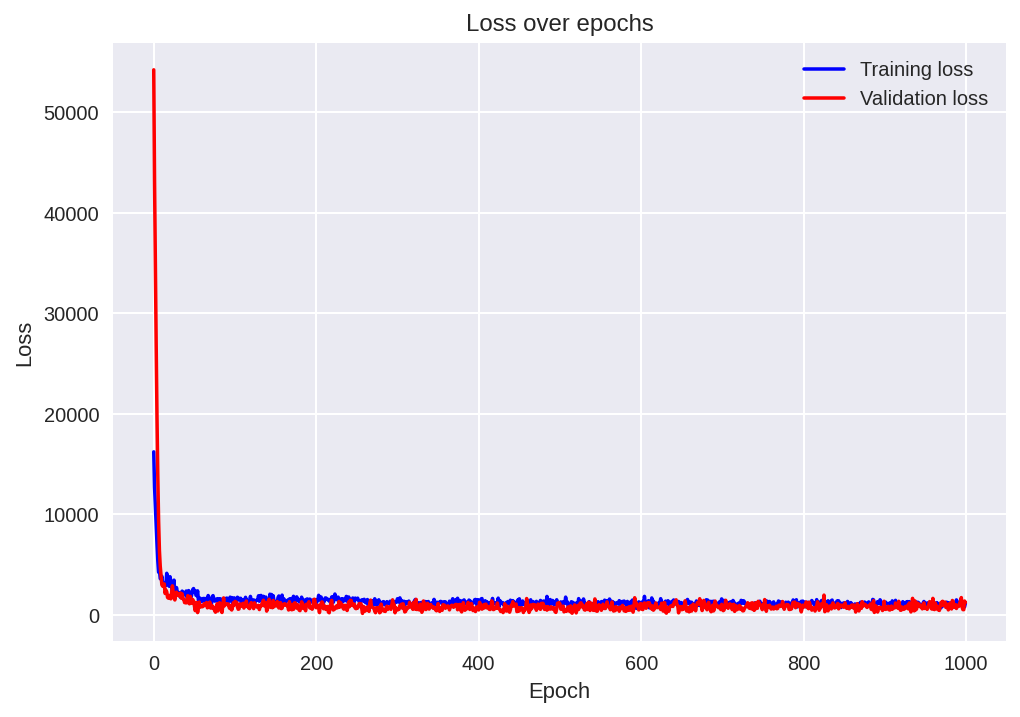

In [ ]:
train_losses = np.array(train_losses)
valid_losses = np.array(valid_losses)

fig, ax = plt.subplots()

ax.plot(train_losses, color='blue', label='Training loss')
ax.plot(valid_losses, color='red', label='Validation loss')

ax.set(title="Loss over epochs", 
       xlabel='Epoch', 
       ylabel='Loss')
ax.legend();

8. Load the best model (with the lowest validation loss):

In [ ]:
state_dict = torch.load('mlp_checkpoint_2.pth')
model.load_state_dict(state_dict)

<All keys matched successfully>

9. Obtain predictions:

In [ ]:
y_pred = []

with torch.no_grad():
    
    model.eval()
        
    for x_val, y_val in valid_loader:
        x_val = x_val.to(device)
        yhat = model(x_val)
        y_pred.append(yhat)
               
y_pred = torch.cat(y_pred).numpy()

10. Plot the predictions:

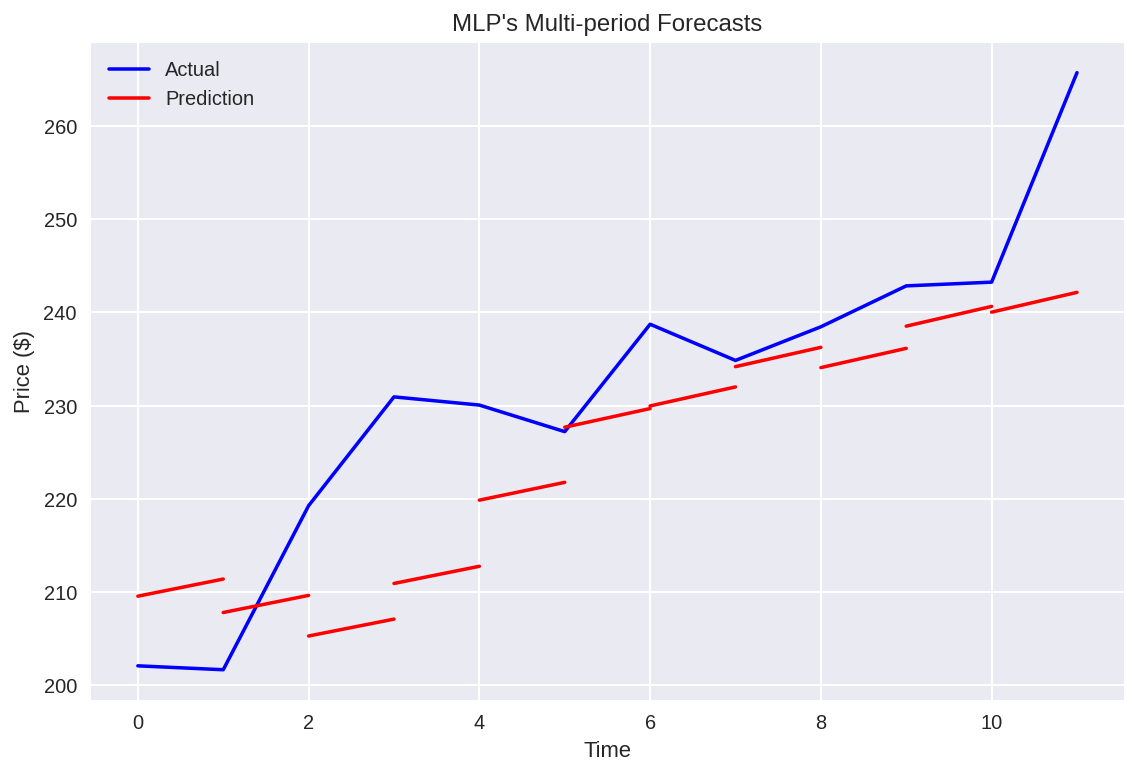

In [ ]:
fig, ax = plt.subplots()

ax.plot(y_valid, color='blue', label='Actual')

for i in range(len(y_pred)):
    if i == 0:
        ax.plot(np.array([i, i + 1]), y_pred[i], color='red', label='Prediction')
    else:
        ax.plot(np.array([i, i + 1]), y_pred[i], color='red')

ax.set(title="MLP's Multi-period Forecasts", 
       xlabel='Time', 
       ylabel='Price ($)')
ax.legend()

plt.tight_layout()
plt.show()

The **Intel Corporation dataset** , we explored deep learning approaches of

1.   CNN
2.   Recurrent Neural Network 

**Intel Corporation** stock price data was downloaded for the last 12 years and uses
monthly data for prediction of stock values using yfinance API provided by Yahoo.

First of all we are going to install the Yfinance library. It is an API by Yahoo which
provides live data of multiple stocks of various companies. Using this API we
fetched our dataset.
Once we had installed the library, we specified the data we were going to
download. From the available data we have chosen the data of stocks for
**Intel Corporation** company whose data ticker is **'INTC'**. We have selected a time frame of
the data i.e. we have defined a time limit of which time frame, we will be fetching
the data. The starting date was chosen to be **January 1st,2010 and ending date
was chosen as Dec 31,2021.**


# Convolutional neural networks for time series forecasting
Convolutional neural networks (CNN) were developed and remained very popular in the image classification domain. However, they can also be applied to 1-dimensional problems, such as predicting the next value in the sequence, be it a time series or the next word in a sentence.

- Convolutional layer: The goal of this layer is to apply convolutional filtering to extract potential features.
- Pooling layer: This layer reduces the size of the image or series while preserving the important characteristics identified by the convolutional layer.
- Fully connected layer: Usually, there are a few fully connected layers at the end of the network to map the features extracted by the network to classes or values.

1. Import the libraries:

In [ ]:
import yfinance as yf
import numpy as np
import os
import random

import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import Dataset, TensorDataset, DataLoader, Subset
from collections import OrderedDict

from sklearn.metrics import mean_squared_error

print(torch.__version__)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

1.10.0+cu111


2. Create some utility functions

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from fastai import *
from fastai.tabular import *
from sklearn import metrics
import numpy as np
import os
import random
import torch

def performance_evaluation_report(model, show_plot=False, labels=None, show_pr_curve=False):
    '''
    Function for creating a performance report of a classification model.
    
    Parameters
    ----------
    model : fastai Learner
        A trained model for Tabular data
    show_plot : bool
        Flag whether to show the plot
    labels : list
        List with the class names.
    show_pr_curve : bool
        Flag whether to also show the PR-curve. For this to take effect, 
        show_plot must be True.
        
    Return
    ------
    stats : pd.Series
        A series with the most important evaluation metrics
    '''

    preds_valid, y_test = model.get_preds(ds_type=DatasetType.Valid)
    y_pred = preds_valid.argmax(dim=-1)
    y_pred_prob = preds_valid.numpy()[:, 1]

    cm = metrics.confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    precision = metrics.precision_score(y_test, y_pred),
    recall = metrics.recall_score(y_test, y_pred),

    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_prob)
    roc_auc = metrics.auc(fpr, tpr)

    precision_vec, recall_vec, thresholds = metrics.precision_recall_curve(
        y_test, y_pred_prob)
    pr_auc = metrics.auc(recall_vec, precision_vec)

    if show_plot:

        if labels is None:
            labels = ['Negative', 'Positive']

        N_SUBPLOTS = 3 if show_pr_curve else 2
        PLOT_WIDTH = 15 if show_pr_curve else 12
        PLOT_HEIGHT = 5 if show_pr_curve else 6

        fig, ax = plt.subplots(
            1, N_SUBPLOTS, figsize=(PLOT_WIDTH, PLOT_HEIGHT))
        fig.suptitle('Performance Evaluation', fontsize=16)

        sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, cmap='BuGn_r', square=True, cbar=False, ax=ax[0],
                    annot_kws={"ha": 'center', "va": 'center'})
        ax[0].set(xlabel='Predicted label',
                  ylabel='Actual label', title='Confusion Matrix')
        ax[0].xaxis.set_ticklabels(labels)
        ax[0].yaxis.set_ticklabels(labels)

        ax[1].plot(fpr, tpr, 'b-', label=f'ROC-AUC = {roc_auc:.2f}')
        ax[1].set(xlabel='False Positive Rate',
                  ylabel='True Positive Rate', title='ROC Curve')
        ax[1].plot(fp/(fp+tn), tp/(tp+fn), 'ro',
                   markersize=8, label='Decision Point')
        ax[1].plot([0, 1], [0, 1], 'r--')
        ax[1].legend(loc='lower right')

        if show_pr_curve:

            ax[2].plot(recall_vec, precision_vec,
                       label=f'PR-AUC = {pr_auc:.2f}')
            ax[2].plot(recall, precision, 'ro',
                       markersize=8, label='Decision Point')
            ax[2].set(xlabel='Recall', ylabel='Precision',
                      title='Precision-Recall Curve')
            ax[2].legend()

    stats = {'accuracy': metrics.accuracy_score(y_test, y_pred),
             'precision': metrics.precision_score(y_test, y_pred),
             'recall': metrics.recall_score(y_test, y_pred),
             'specificity': (tn / (tn + fp)),
             'f1_score': metrics.f1_score(y_test, y_pred),
             'cohens_kappa': metrics.cohen_kappa_score(y_test, y_pred),
             'roc_auc': roc_auc,
             'pr_auc': pr_auc}

    return stats


def create_input_data(series, n_lags=1, n_leads=1):
    '''
    Function for transforming time series into input acceptable by a multilayer perceptron.
    
    Parameters
    ----------
    series : np.array
        The time series to be transformed
    n_lags : int
        The number of lagged observations to consider as features
    n_leads : int
        The number of future periods we want to forecast for
        
    Returns
    -------
    X : np.array
        Array of features
    y : np.array
        Array of target
    '''
    X = []
    y = []
    for step in range(len(series) - n_lags - n_leads + 1):
        end_step = step + n_lags
        forward_end = end_step + n_leads
        X.append(series[step:end_step])
        y.append(series[end_step:forward_end])
    return np.array(X), np.array(y)

# custom function for reproducibility
def custom_set_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(seed)
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)


## 3. Define the parameters: Here we are going to do the same process of downloading the data of Intel Corporation. We have choosen the same time frame that we earlier chose for the McDonald Dataset

In [ ]:
# data
TICKER = 'INTC'
START_DATE = '2010-01-02'
END_DATE = '2021-12-31'
VALID_START = '2021-07-01'

N_LAGS = 12  #use the previous 12 days price to forecast the next day price

# neural network 
BATCH_SIZE = 5
N_EPOCHS = 2000

In [ ]:
df = yf.download(TICKER, 
                 start=START_DATE, 
                 end=END_DATE,
                 progress=False)

4. Download and prepare the data: (data should be in form of a numpy array

In [ ]:
df = yf.download(TICKER, 
                 start=START_DATE, 
                 end=END_DATE,
                 progress=False)
df = df.resample('W-MON').last()
valid_size = df.loc[VALID_START:END_DATE].shape[0]
prices = df['Adj Close'].values

In [ ]:
type(prices)

numpy.ndarray

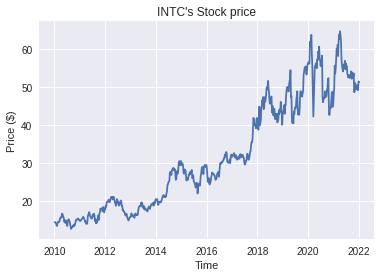

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()

ax.plot(df.index, prices)
ax.set(title=f"{TICKER}'s Stock price", xlabel='Time', ylabel='Price ($)');

5. Transform the time series into input for the CNN:

In [ ]:
X, y = create_input_data(prices, N_LAGS)
#X=torch.from_numpy(X)
#y=torch.from_numpy(y)


In [ ]:
X[0:2], y[0:2]

(array([[14.466533, 14.515028, 14.411102, 14.078533, 13.586621, 13.513722, 14.267971, 14.575269, 14.575269, 14.505425,
         14.784783, 15.532047],
        [14.515028, 14.411102, 14.078533, 13.586621, 13.513722, 14.267971, 14.575269, 14.575269, 14.505425, 14.784783,
         15.532047, 15.594908]]), array([[15.594908],
        [15.776486]]))

6. Obtain the naïve forecast:

In [ ]:
naive_pred = torch.from_numpy(prices[len(prices) - valid_size - 1:-1])

y_valid = torch.from_numpy(prices[len(prices) - valid_size:])

naive_mse = mean_squared_error(y_valid, naive_pred)
naive_rmse = np.sqrt(naive_mse)
print(f"Naive forecast - MSE: {naive_mse:.2f}, RMSE: {naive_rmse:.2f}")

Naive forecast - MSE: 2.19, RMSE: 1.48


7. Prepare the `DataLoader` objects:

In [ ]:
# set seed for reproducibility
custom_set_seed(42)

valid_ind = len(X) - valid_size

X_tensor = torch.from_numpy(X).float()
y_tensor = torch.from_numpy(y).float().unsqueeze(dim=1)

dataset = TensorDataset(X_tensor, y_tensor)

train_dataset = Subset(dataset, list(range(valid_ind)))
valid_dataset = Subset(dataset, list(range(valid_ind, len(X))))

train_loader = DataLoader(dataset=train_dataset, 
                          batch_size=BATCH_SIZE)
valid_loader = DataLoader(dataset=valid_dataset, 
                          batch_size=BATCH_SIZE)

Check the size of the datasets:

In [ ]:
print(f'Size of datasets - training: {len(train_loader.dataset)} | validation: {len(valid_loader.dataset)}')

Size of datasets - training: 589 | validation: 26


8. Define the CNN's architecture:

In [ ]:
class Flatten(nn.Module):
    def forward(self, x):
        return x.view(x.size()[0], -1)

model = nn.Sequential(OrderedDict([
    ('conv_1', nn.Conv1d(1, 32, 3, padding=1)),
    ('max_pool_1', nn.MaxPool1d(2)),
    ('relu_1', nn.ReLU()),
    ('flatten', Flatten()),
    ('fc_1', nn.Linear(192, 50)),
    ('relu_2', nn.ReLU()),
    ('dropout_1', nn.Dropout(0.4)),
    ('fc_2', nn.Linear(50, 1))
]))

print(model)

Sequential(
  (conv_1): Conv1d(1, 32, kernel_size=(3,), stride=(1,), padding=(1,))
  (max_pool_1): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (relu_1): ReLU()
  (flatten): Flatten()
  (fc_1): Linear(in_features=192, out_features=50, bias=True)
  (relu_2): ReLU()
  (dropout_1): Dropout(p=0.4, inplace=False)
  (fc_2): Linear(in_features=50, out_features=1, bias=True)
)


9. Instantiate the model, the loss function and the optimizer:

In [ ]:
model = model.to(device)
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

10. Train the network:

In [ ]:
PRINT_EVERY = 50
train_losses, valid_losses = [], []

for epoch in range(N_EPOCHS):
    running_loss_train = 0
    running_loss_valid = 0

    model.train()
    
    for x_batch, y_batch in train_loader:
        
        optimizer.zero_grad()
        
        x_batch = x_batch.to(device)
        x_batch = x_batch.view(x_batch.shape[0], 1, N_LAGS)
        y_batch = y_batch.to(device)
        y_batch = y_batch.view(y_batch.shape[0], 1, 1)
        y_hat = model(x_batch).view(y_batch.shape[0], 1, 1)
        loss = torch.sqrt(loss_fn(y_batch, y_hat))
        loss.backward()
        optimizer.step()
        running_loss_train += loss.item() * x_batch.size(0)
        
    epoch_loss_train = running_loss_train / len(train_loader.dataset)
    train_losses.append(epoch_loss_train)

    with torch.no_grad():
        model.eval()
        for x_val, y_val in valid_loader:
            x_val = x_val.to(device)
            x_val = x_val.view(x_val.shape[0], 1, N_LAGS)
            y_val = y_val.to(device)
            y_val = y_val.view(y_val.shape[0], 1, 1)
            y_hat = model(x_val).view(y_val.shape[0], 1, 1)
            loss = torch.sqrt(loss_fn(y_val, y_hat))
            running_loss_valid += loss.item() * x_val.size(0)
            
        epoch_loss_valid = running_loss_valid / len(valid_loader.dataset)
            
        if epoch > 0 and epoch_loss_valid < min(valid_losses):
            best_epoch = epoch
            torch.save(model.state_dict(), './cnn_checkpoint.pth')
            
        valid_losses.append(epoch_loss_valid)

    if epoch % PRINT_EVERY == 0:
        print(f"<{epoch}> - Train. loss: {epoch_loss_train:.6f} \t Valid. loss: {epoch_loss_valid:.6f}")
        
print(f'Lowest loss recorded in epoch: {best_epoch}')

<0> - Train. loss: 7.397581 	 Valid. loss: 1.878685
<50> - Train. loss: 5.958918 	 Valid. loss: 3.435033
<100> - Train. loss: 5.260216 	 Valid. loss: 1.551319
<150> - Train. loss: 5.327752 	 Valid. loss: 3.344005
<200> - Train. loss: 4.638206 	 Valid. loss: 2.507967
<250> - Train. loss: 4.284647 	 Valid. loss: 2.405184
<300> - Train. loss: 4.079517 	 Valid. loss: 3.078639
<350> - Train. loss: 3.739532 	 Valid. loss: 2.087413
<400> - Train. loss: 3.390720 	 Valid. loss: 1.571490
<450> - Train. loss: 3.394146 	 Valid. loss: 1.684045
<500> - Train. loss: 3.454159 	 Valid. loss: 1.377631
<550> - Train. loss: 3.281358 	 Valid. loss: 1.471798
<600> - Train. loss: 3.428148 	 Valid. loss: 2.310316
<650> - Train. loss: 3.384142 	 Valid. loss: 2.143242
<700> - Train. loss: 3.139016 	 Valid. loss: 2.035328
<750> - Train. loss: 3.226354 	 Valid. loss: 1.437872
<800> - Train. loss: 3.233110 	 Valid. loss: 2.058021
<850> - Train. loss: 3.257462 	 Valid. loss: 1.281868
<900> - Train. loss: 3.206430 	

11. Plot the losses over epochs:

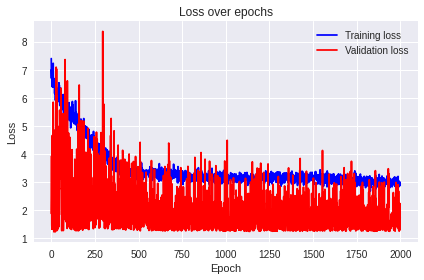

In [ ]:
train_losses = np.array(train_losses)
valid_losses = np.array(valid_losses)

fig, ax = plt.subplots()

ax.plot(train_losses, color='blue', label='Training loss')
ax.plot(valid_losses, color='red', label='Validation loss')

ax.set(title="Loss over epochs", 
       xlabel='Epoch', 
       ylabel='Loss')
ax.legend()

plt.tight_layout()
plt.show()

12. Load the best model (with the lowest validation loss):

In [ ]:
state_dict = torch.load('cnn_checkpoint.pth')
model.load_state_dict(state_dict)

<All keys matched successfully>

13. Obtain the predictions:

In [ ]:
y_pred, y_valid = [], []

with torch.no_grad():
    
    model.eval()
        
    for x_val, y_val in valid_loader:
        x_val = x_val.to(device)
        x_val = x_val.view(x_val.shape[0], 1, N_LAGS)
        y_pred.append(model(x_val))
        y_valid.append(y_val)
        
y_pred = torch.cat(y_pred).numpy().flatten()
y_valid = torch.cat(y_valid).numpy().flatten()

14. Evaluate the predictions:

CNN's forecast - MSE: 1.62, RMSE: 1.27


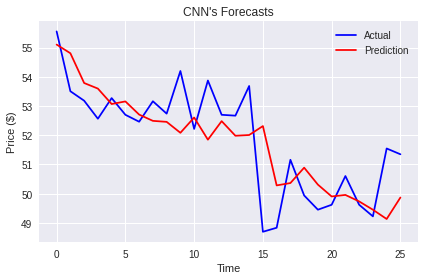

In [ ]:
y_valid_torch=torch.from_numpy(y_valid)
y_pred_torch=torch.from_numpy(y_pred)

cnn_mse = mean_squared_error(y_valid_torch, y_pred_torch)
cnn_rmse = np.sqrt(cnn_mse)
print(f"CNN's forecast - MSE: {cnn_mse:.2f}, RMSE: {cnn_rmse:.2f}")

fig, ax = plt.subplots()

ax.plot(y_valid, color='blue', label='Actual')
ax.plot(y_pred, color='red', label='Prediction')
#ax.plot(naive_pred, color='green', label='Naïve')

ax.set(title="CNN's Forecasts", 
       xlabel='Time', 
       ylabel='Price ($)')
ax.legend()

plt.tight_layout()
plt.show()

## Recurrent neural networks for time series forecasting
Recurrent Neural Networks (RNNs) are a special type of neural network designed to work with sequential data. They are popular for time series forecasting as well as for solving NLP problems such as machine translation, text generation, and speech recognition. There are numerous extensions of the RNNs, such as Long-Short Term Memory (LSTM) networks and Gated Recurrent Unit (GRU) networks, which are currently part of some of the state-of-the-art architectures. However, it is good to be familiar with the original vanilla RNN.


One of the main differences between the feedforward networks and RNNs is that the former take a fixed size input at once to produce a fixed size output. On the other hand,
RNNs do not take all the input data at once – they ingest the data sequentially, one at a time. At each step, the network applies a series of calculations to produce the output, also known as the hidden state. 

Source: https://en.wikipedia.org/wiki/Recurrent_neural_network

1. Import the libraries:

In [ ]:
import yfinance as yf
import numpy as np

import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import Dataset, TensorDataset, DataLoader, Subset
from collections import OrderedDict

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

print(torch.__version__)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

1.10.0+cu111


2. Define the parameters:

In [ ]:
# data
TICKER = 'INTC'
START_DATE = '2010-01-02'
END_DATE = '2021-12-31'
VALID_START = '2021-07-01'
N_LAGS = 12

# neural network 
BATCH_SIZE = 16
N_EPOCHS = 100

3. Download and prepare the data:

In [ ]:
df = yf.download(TICKER, 
                 start=START_DATE, 
                 end=END_DATE,
                 progress=False)

df = df.resample('W-MON').last()
valid_size = df.loc[VALID_START:END_DATE].shape[0]
prices = df['Adj Close'].values.reshape(-1, 1)

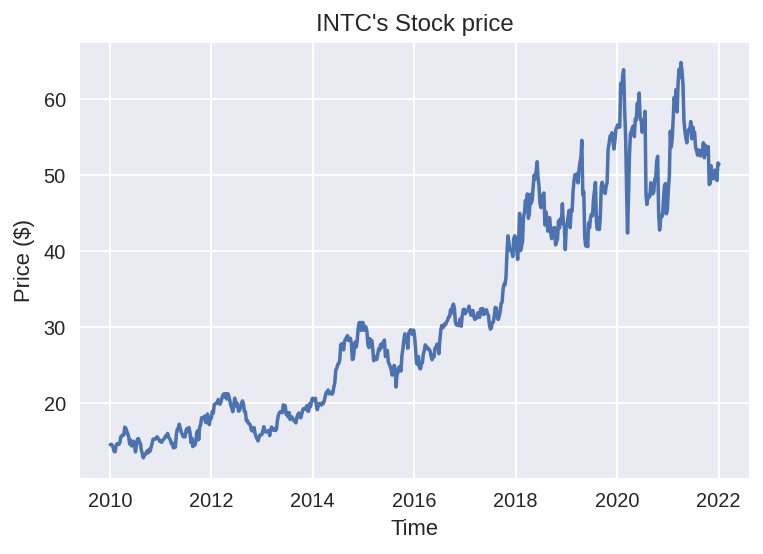

In [ ]:
fig, ax = plt.subplots()

ax.plot(df.index, prices)
ax.set(title=f"{TICKER}'s Stock price", 
       xlabel='Time', 
       ylabel='Price ($)');

4. Scale the time series of prices:

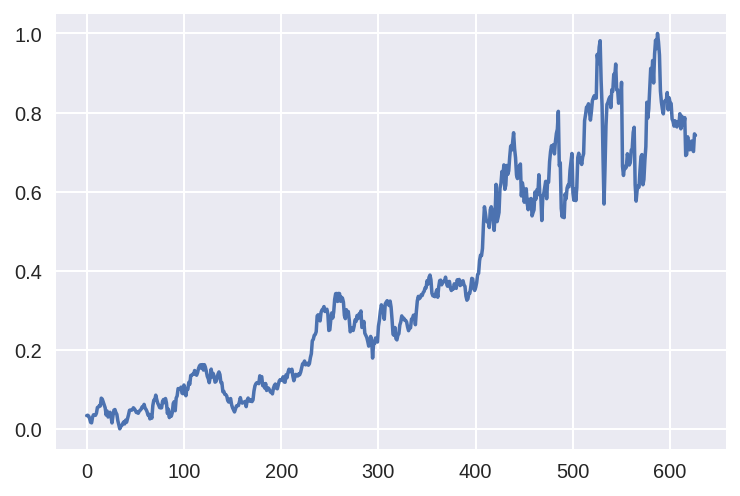

In [ ]:
valid_ind = len(prices) - valid_size

minmax = MinMaxScaler(feature_range=(0, 1))

prices_train = prices[:valid_ind]
prices_valid = prices[valid_ind:]

minmax.fit(prices_train)

prices_train = minmax.transform(prices_train)
prices_valid = minmax.transform(prices_valid)

prices_scaled = np.concatenate((prices_train, 
                                prices_valid)).flatten()
plt.plot(prices_scaled)

5. Transform the time series into input for the RNN:

In [ ]:
X, y = create_input_data(prices_scaled, N_LAGS)

6. Obtain the naïve forecast:

In [ ]:
naive_pred = prices[len(prices)-valid_size-1:-1]
y_valid = prices[len(prices)-valid_size:]

naive_mse = mean_squared_error(y_valid, naive_pred)
naive_rmse = np.sqrt(naive_mse)
print(f"Naive forecast - MSE: {naive_mse:.4f}, RMSE: {naive_rmse:.4f}")

Naive forecast - MSE: 2.1920, RMSE: 1.4806


7. Prepare the `DataLoader` objects:

In [ ]:
# set seed for reproducibility
custom_set_seed(42)

valid_ind = len(X) - valid_size

X_tensor = torch.from_numpy(X).float().reshape(X.shape[0], 
                                               X.shape[1], 
                                               1)
y_tensor = torch.from_numpy(y).float().reshape(X.shape[0], 1)

dataset = TensorDataset(X_tensor, y_tensor)

train_dataset = Subset(dataset, list(range(valid_ind)))
valid_dataset = Subset(dataset, list(range(valid_ind, len(X))))

train_loader = DataLoader(dataset=train_dataset, 
                          batch_size=BATCH_SIZE, 
                          shuffle=True)
valid_loader = DataLoader(dataset=valid_dataset, 
                          batch_size=BATCH_SIZE)

Check the size of the datasets:

In [ ]:
print(f'Size of datasets - training: {len(train_loader.dataset)} | validation: {len(valid_loader.dataset)}')

Size of datasets - training: 589 | validation: 26


8. Define the model:

In [ ]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, n_layers, output_size):
        super(RNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, 
                          n_layers, batch_first=True,
                          nonlinearity='relu')
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        output, _ = self.rnn(x)
        output = self.fc(output[:,-1,:]) 
        return output

9. Instantiate the model, the loss function and the optimizer:

In [ ]:
model = RNN(input_size=1, hidden_size=6, 
            n_layers=1, output_size=1).to(device)
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

10. Train the network:

In [ ]:
PRINT_EVERY = 10
train_losses, valid_losses = [], []

for epoch in range(N_EPOCHS):
    running_loss_train = 0
    running_loss_valid = 0

    model.train()
    
    for x_batch, y_batch in train_loader:
        
        optimizer.zero_grad()
        
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)
        y_hat = model(x_batch)
        loss = torch.sqrt(loss_fn(y_batch, y_hat))
        loss.backward()
        optimizer.step()
        running_loss_train += loss.item() * x_batch.size(0)
        
    epoch_loss_train = running_loss_train / len(train_loader.dataset)
    train_losses.append(epoch_loss_train)

    with torch.no_grad():
        model.eval()
        for x_val, y_val in valid_loader:
            x_val = x_val.to(device)
            y_val = y_val.to(device)
            y_hat = model(x_val)
            loss = torch.sqrt(loss_fn(y_val, y_hat))
            running_loss_valid += loss.item() * x_val.size(0)
            
        epoch_loss_valid = running_loss_valid / len(valid_loader.dataset)
            
        if epoch > 0 and epoch_loss_valid < min(valid_losses):
            best_epoch = epoch
            torch.save(model.state_dict(), './rnn_checkpoint.pth')
            
        valid_losses.append(epoch_loss_valid)

    if epoch % PRINT_EVERY == 0:
        print(f"<{epoch}> - Train. loss: {epoch_loss_train:.4f} \t Valid. loss: {epoch_loss_valid:.4f}")
        
print(f'Lowest loss recorded in epoch: {best_epoch}')

<0> - Train. loss: 0.3230 	 Valid. loss: 0.4138
<10> - Train. loss: 0.0343 	 Valid. loss: 0.0285
<20> - Train. loss: 0.0349 	 Valid. loss: 0.0336
<30> - Train. loss: 0.0325 	 Valid. loss: 0.0290
<40> - Train. loss: 0.0309 	 Valid. loss: 0.0265
<50> - Train. loss: 0.0313 	 Valid. loss: 0.0254
<60> - Train. loss: 0.0304 	 Valid. loss: 0.0255
<70> - Train. loss: 0.0289 	 Valid. loss: 0.0255
<80> - Train. loss: 0.0283 	 Valid. loss: 0.0257
<90> - Train. loss: 0.0275 	 Valid. loss: 0.0282
Lowest loss recorded in epoch: 29


11. Plot the losses over epochs:

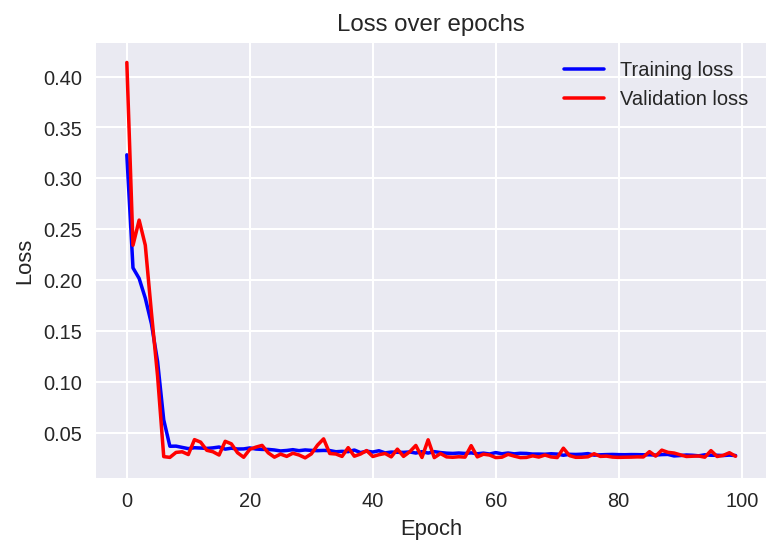

In [ ]:
train_losses = np.array(train_losses)
valid_losses = np.array(valid_losses)

fig, ax = plt.subplots()

ax.plot(train_losses, color='blue', label='Training loss')
ax.plot(valid_losses, color='red', label='Validation loss')

ax.set(title="Loss over epochs", 
       xlabel='Epoch', 
       ylabel='Loss')
ax.legend()

plt.show()

12. Load the best model (with the lowest validation loss):

In [ ]:
state_dict = torch.load('rnn_checkpoint.pth')
model.load_state_dict(state_dict)

<All keys matched successfully>

13. Obtain the predictions:

In [ ]:
y_pred = []

with torch.no_grad():
    
    model.eval()
    
    for x_val, y_val in valid_loader:
        x_val = x_val.to(device)
        y_hat = model(x_val)
        y_pred.append(y_hat)
        
y_pred = torch.cat(y_pred).numpy()
y_pred = minmax.inverse_transform(y_pred).flatten()

14. Evaluate the predictions:

RNN's forecast - MSE: 1.7283, RMSE: 1.3146


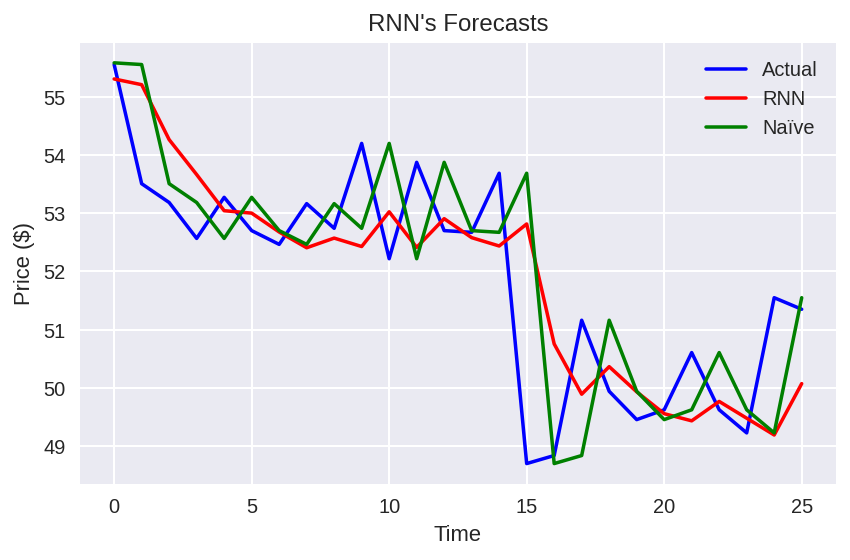

In [ ]:
rnn_mse = mean_squared_error(y_valid, y_pred)
rnn_rmse = np.sqrt(rnn_mse)
print(f"RNN's forecast - MSE: {rnn_mse:.4f}, RMSE: {rnn_rmse:.4f}")

fig, ax = plt.subplots()

ax.plot(y_valid, color='blue', label='Actual')
ax.plot(y_pred, color='red', label='RNN')
ax.plot(naive_pred, color='green', label='Naïve')

ax.set(title="RNN's Forecasts", 
       xlabel='Time', 
       ylabel='Price ($)')
ax.legend()

plt.tight_layout()
plt.show()